In [58]:
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import plotly.express as px
import plotly.offline as pyo
from pandas.plotting import scatter_matrix

DATA READ CSV

In [12]:
irisf = pd.read_csv('/content/sanjai data_master_IRIS.csv')


In [13]:
irisf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
irisf.shape

(150, 5)

In [22]:
px.scatter(irisf, x='species', y='petal_width')

In [23]:
px.line(irisf, x='species', y='petal_length')

In [24]:
irisf = irisf.rename(columns={'sepal_length':'SepalLength','sepal_width':'SepalWidth',
                           'petal_length':'PetalLength','	petal_width	':'PetalWidth'})

In [25]:
irisf.head()

,SepalLength,SepalWidth,PetalLength,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Correlation *Visualization*

In [31]:
px.scatter_matrix(irisf, color='species', title='iris', dimensions=['SepalLength','SepalWidth','PetalLength','petal_width'])

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [38]:
x= irisf.drop('species', axis=1)
y = irisf['species'].copy()

In [39]:
print(irisf.describe())

       SepalLength  SepalWidth  PetalLength  petal_width
count   150.000000  150.000000   150.000000   150.000000
mean      5.843333    3.054000     3.758667     1.198667
std       0.828066    0.433594     1.764420     0.763161
min       4.300000    2.000000     1.000000     0.100000
25%       5.100000    2.800000     1.600000     0.300000
50%       5.800000    3.000000     4.350000     1.300000
75%       6.400000    3.300000     5.100000     1.800000
max       7.900000    4.400000     6.900000     2.500000


In [41]:
print(irisf.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [42]:
array = irisf.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [44]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.055277)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


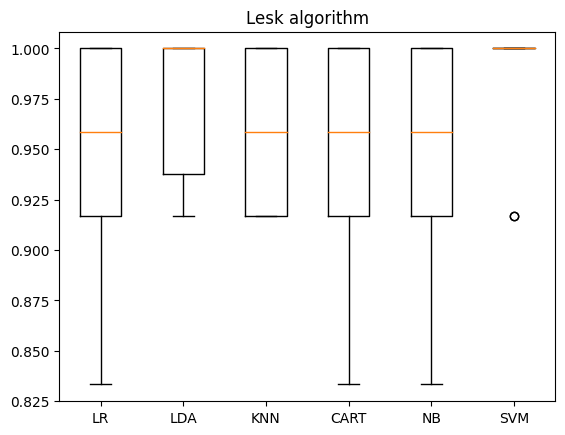

In [46]:
pyplot.boxplot(results, labels=names)
pyplot.title('Lesk algorithm')
pyplot.show()

In [47]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [48]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [51]:
irisf.isnull().sum()


SepalLength    0
SepalWidth     0
PetalLength    0
petal_width    0
species        0
dtype: int64

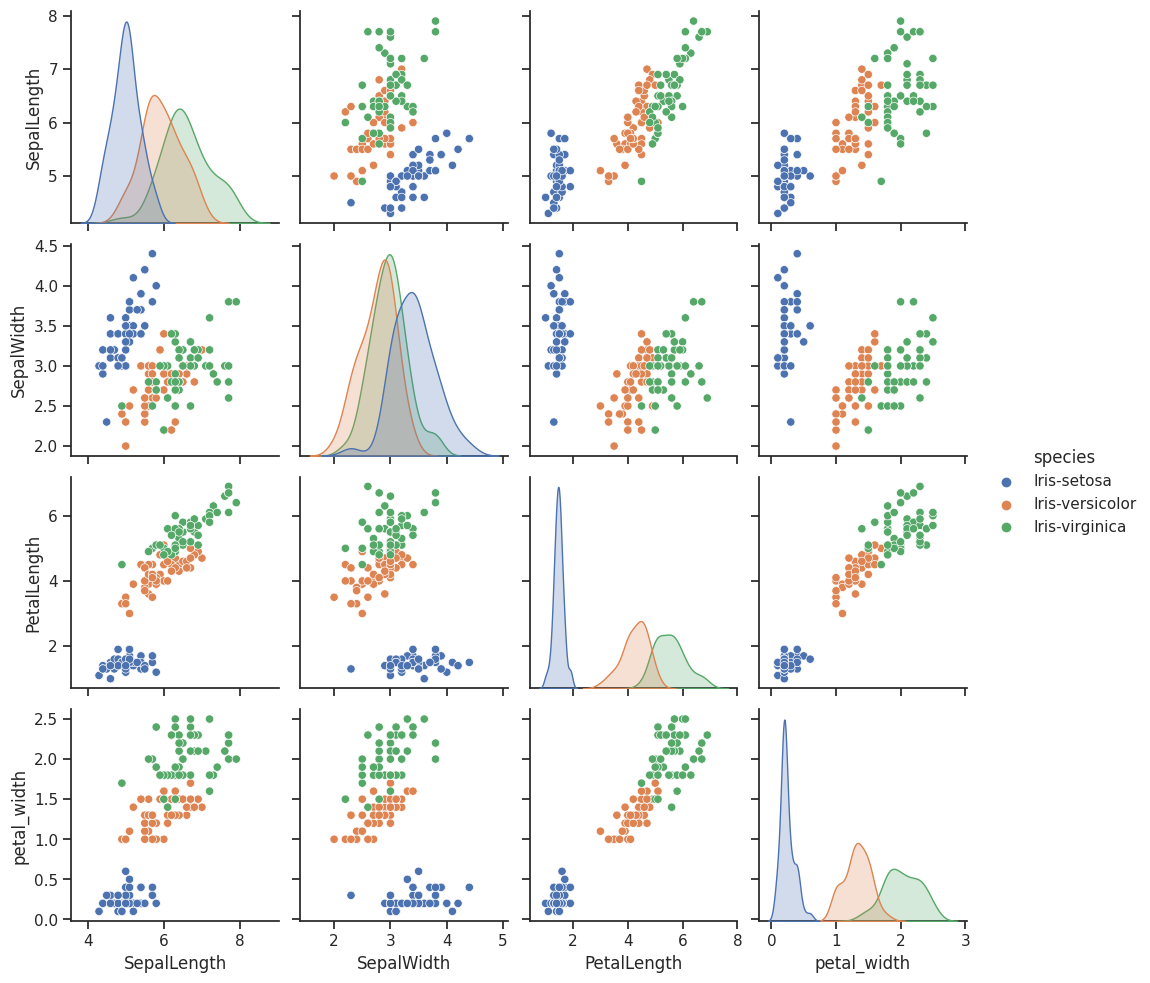

In [61]:
sns.set(style = "ticks")
sns.pairplot(irisf, hue = "species")

Data Modeling

In [62]:
X = irisf.drop(['species'], axis=1)
Y = irisf['species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=25)

In [63]:
print("X_Train Shape:", X_train.shape)
print("X_Test Shape:", X_test.shape)
print("Y_Train Shape:", X_train.shape)
print("Y_Test Shape:", Y_test.shape)

X_Train Shape: (112, 4)
X_Test Shape: (38, 4)
Y_Train Shape: (112, 4)
Y_Test Shape: (38,)


In [77]:
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = "auto")))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma = "auto")))

In [89]:
def test_model(model):
   model.fit(X_train, Y_train)
   predictions = model.predict(X_test)



In [96]:

def test_model(model):

    model.fit(X_train, Y_train)


    predictions = model.predict(X_test)


    print("Accuracy:", accuracy_score(Y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, predictions))
    print("Classification Report:")
    print(classification_report(Y_test, predictions))


In [101]:

models = []


models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = "auto")))
models.append(('LDA', LinearDiscriminantAnalysis()))


models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma = "auto")))

print("Model Accuracy")


names = []
accuracy = []
for name, model in models:



    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')


    names.append(name)
    accuracy.append(cv_results)
    msg = "%s: Accuracy = %f" % (name, cv_results.mean())
    print(msg)

Model Accuracy
LR: Accuracy = 0.946970
LDA: Accuracy = 0.982576
CART: Accuracy = 0.954545
KNN: Accuracy = 0.973485
GNB: Accuracy = 0.955303
SVC: Accuracy = 0.973485


In [98]:
models = []


models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = "auto")))
models.append(('LDA', LinearDiscriminantAnalysis()))

models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma = "auto")))

In [102]:
for name, model in models:
    print("----------------")
    print("Testing:", name)
    test_model(model)

----------------
Testing: LR
Accuracy: 0.9210526315789473
Confusion Matrix:
[[11  0  0]
 [ 0 13  3]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.81      0.90        16
 Iris-virginica       0.79      1.00      0.88        11

       accuracy                           0.92        38
      macro avg       0.93      0.94      0.93        38
   weighted avg       0.94      0.92      0.92        38

----------------
Testing: LDA
Accuracy: 0.9473684210526315
Confusion Matrix:
[[11  0  0]
 [ 0 15  1]
 [ 0  1 10]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.95        38
      macro avg       0.95      0.95  